## Argoid Data Assessment

## Timeline
<br/>
1. Data Understanding<br/>
2. Addintion of features<br/>
3. Modlling Functions [Fit, Predict, Dictionary Creation]<br/>
4. Training and creation of Frequency Matrix<br/>
5. Prediction<br/>
6. Data Visualization<br/>
7. Converting the Solution into csv

In [1]:
import numpy as np
import pandas as pd

### Data understanding

In [48]:
data = pd.read_csv('transaction_data.csv')

In [14]:
len(data['TransactionId'].unique())

25900

So , We have a total of 25900 unique transactions at the store between the period Feb 2018 to Feb 2019

In [15]:
len(data['ItemCode'].unique())

3407

So, We have total of 3407 unque items/products at the store

In [16]:
len(data['UserId'].unique())

4373

So, we have total of 4373 customers during that whole year

In [24]:
data['TransactionTime'].describe()

count                          1083818
unique                           23260
top       Sat Jan 12 10:41:00 IST 2019
freq                              2228
Name: TransactionTime, dtype: object

In [50]:
data = data.sort_values(by=['TransactionId'], ascending=True)

In [85]:
data.head()

,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country,Total_Cost,month_year
55169,374850,5900015,Mon Feb 12 04:26:00 IST 2018,477792,SET 7 BABUSHKA NESTING BOXES,6,10.56,United Kingdom,63.36,Feb2018
933958,374850,5900015,Mon Feb 12 04:26:00 IST 2018,1787583,WHITE HANGING HEART T-LIGHT HOLDER,18,3.52,United Kingdom,63.36,Feb2018
323263,374850,5900015,Mon Feb 12 04:26:00 IST 2018,1492113,WHITE METAL LANTERN,18,4.68,United Kingdom,84.24,Feb2018
538323,374850,5900015,Mon Feb 12 04:26:00 IST 2018,1764609,KNITTED UNION FLAG HOT WATER BOTTLE,18,4.68,United Kingdom,84.24,Feb2018
466405,374850,5900015,Mon Feb 12 04:26:00 IST 2018,1772526,CREAM CUPID HEARTS COAT HANGER,24,3.80,United Kingdom,91.20,Feb2018


### Adding more Features
<br/>
We added two new features 
<br/>
1. Month_Year : which shows only the month and the year extracted from the Timestamp
<br/>
2. Total_Cost : It is a multiplication of NumberOfItemsPurchased and CostPerItem

In [ ]:
data['Total_Cost'] = data['NumberOfItemsPurchased']*data['CostPerItem']

In [89]:
X = pd.DataFrame({'A':data['TransactionId'],'B':data['ItemCode'],'C':data['ItemDescription']})

####  X IS OUR WORKING DATAFRAME.. WE WILL USE THIS FOR TRAINING OUR MODEL

In [590]:
X.head() 

,A,B,C
55169,5900015,477792,SET 7 BABUSHKA NESTING BOXES
933958,5900015,1787583,WHITE HANGING HEART T-LIGHT HOLDER
323263,5900015,1492113,WHITE METAL LANTERN
538323,5900015,1764609,KNITTED UNION FLAG HOT WATER BOTTLE
466405,5900015,1772526,CREAM CUPID HEARTS COAT HANGER


# Frequency of Bought Together will be considerd as the prediction system 

## Creating Modelling Functions

### Dictionary 
<br/>
It tracks the User_Ids and match them with a simpler code 

In [ ]:
Code = np.zeros([2,3407])
temp = X['B'].unique()
temp.sort()
Code[0] = temp
Code[1] = np.arange(3407)
Code = Code.T
Code = dict(Code)

### Fit Function
<br/>
This is the main function which helps in traing the data and creating the frequency matrix

In [595]:
def Fit(A,B):
    n = len(B.unique())
    Matrix = np.zeros([n,n])
    for i in range(len(Transactions)):
        index_list = X[X['A'] == Transactions[i]]['B'].index
        for j in range(len(index_list)-1):
            for k in range(j+1,len(index_list)):
                a = int(Code[X['B'][index_list[j]]])
                b = int(Code[X['B'][index_list[k]]])
                Matrix[a][b] += 1
                Matrix[b][a] += 1
        print(((i+1)/len(Transactions))*100)
        print("%")
    return Matrix
    
    

### Predict
<br/>
As the name suggests , this function predicts the next 2 possible items

In [ ]:
def Predict(A):
    temp_code = int(Code[A])
    layout = Model[temp_code].copy()
    layout[temp_code] = -1
    layout[0] = -1
    first = np.argmax(layout)
    layout[first] = -1
    second = np.argmax(layout)
    prediction = np.array([int(A),int(temp[first]),int(temp[second])])
    return prediction 

### Name
<br/>
Gives item Description from the ItemCode

In [ ]:
def Name(value):
    index = data[data['ItemCode'] == int(value)]['ItemDescription'].index[0]
    link = data['ItemDescription'][index]
    return link

## Training

In [594]:
Transactions = X['A'].unique()

In [237]:
Model = Fit(X['A'],X['B'])

0.003861003861003861
%
0.007722007722007722
%
0.011583011583011582
%
0.015444015444015444
%
0.019305019305019305
%
0.023166023166023165
%
0.02702702702702703
%
0.03088803088803089
%
0.03474903474903475
%
0.03861003861003861
%
0.04247104247104247
%
0.04633204633204633
%
0.0501930501930502
%
0.05405405405405406
%
0.05791505791505791
%
0.06177606177606178
%
0.06563706563706563
%
0.0694980694980695
%
0.07335907335907337
%
0.07722007722007722
%
0.08108108108108107
%
0.08494208494208494
%
0.0888030888030888
%
0.09266409266409266
%
0.09652509652509653
%
0.1003861003861004
%
0.10424710424710425
%
0.10810810810810811
%
0.11196911196911198
%
0.11583011583011582
%
0.11969111969111969
%
0.12355212355212356
%
0.1274131274131274
%
0.13127413127413126
%
0.13513513513513514
%
0.138996138996139
%
0.14285714285714285
%
0.14671814671814673
%
0.15057915057915058
%
0.15444015444015444
%
0.15830115830115832
%
0.16216216216216214
%
0.16602316602316602
%
0.16988416988416988
%
0.17374517374517373
%
0.177606177

1.583011583011583
%
1.586872586872587
%
1.5907335907335907
%
1.5945945945945945
%
1.5984555984555984
%
1.6023166023166022
%
1.6061776061776063
%
1.61003861003861
%
1.613899613899614
%
1.6177606177606176
%
1.6216216216216217
%
1.6254826254826253
%
1.6293436293436294
%
1.633204633204633
%
1.6370656370656371
%
1.6409266409266408
%
1.6447876447876448
%
1.648648648648649
%
1.6525096525096525
%
1.6563706563706564
%
1.6602316602316602
%
1.664092664092664
%
1.667953667953668
%
1.6718146718146718
%
1.6756756756756757
%
1.6795366795366795
%
1.6833976833976831
%
1.6872586872586872
%
1.6911196911196913
%
1.694980694980695
%
1.698841698841699
%
1.7027027027027026
%
1.7065637065637067
%
1.7104247104247103
%
1.7142857142857144
%
1.718146718146718
%
1.7220077220077221
%
1.7258687258687258
%
1.7297297297297298
%
1.7335907335907335
%
1.7374517374517375
%
1.7413127413127414
%
1.7451737451737452
%
1.749034749034749
%
1.752895752895753
%
1.7567567567567568
%
1.7606177606177604
%
1.7644787644787645
%
1.7683

3.131274131274131
%
3.135135135135135
%
3.138996138996139
%
3.1428571428571432
%
3.1467181467181464
%
3.1505791505791505
%
3.1544401544401546
%
3.1583011583011587
%
3.1621621621621623
%
3.166023166023166
%
3.16988416988417
%
3.173745173745174
%
3.1776061776061777
%
3.1814671814671813
%
3.1853281853281854
%
3.189189189189189
%
3.193050193050193
%
3.1969111969111967
%
3.2007722007722004
%
3.2046332046332044
%
3.2084942084942085
%
3.2123552123552126
%
3.216216216216216
%
3.22007722007722
%
3.223938223938224
%
3.227799227799228
%
3.231660231660231
%
3.2355212355212353
%
3.2393822393822393
%
3.2432432432432434
%
3.2471042471042475
%
3.2509652509652507
%
3.2548262548262548
%
3.258687258687259
%
3.262548262548263
%
3.266409266409266
%
3.27027027027027
%
3.2741312741312742
%
3.2779922779922783
%
3.2818532818532815
%
3.2857142857142856
%
3.2895752895752897
%
3.2934362934362937
%
3.297297297297298
%
3.301158301158301
%
3.305019305019305
%
3.308880308880309
%
3.312741312741313
%
3.316602316602316

4.698841698841698
%
4.702702702702703
%
4.706563706563706
%
4.710424710424711
%
4.714285714285714
%
4.718146718146718
%
4.722007722007722
%
4.725868725868726
%
4.72972972972973
%
4.7335907335907335
%
4.737451737451737
%
4.741312741312742
%
4.745173745173745
%
4.749034749034749
%
4.7528957528957525
%
4.756756756756757
%
4.760617760617761
%
4.764478764478765
%
4.768339768339768
%
4.772200772200772
%
4.776061776061776
%
4.779922779922781
%
4.783783783783783
%
4.787644787644788
%
4.7915057915057915
%
4.795366795366796
%
4.7992277992278
%
4.803088803088803
%
4.806949806949807
%
4.8108108108108105
%
4.814671814671815
%
4.818532818532819
%
4.822393822393822
%
4.826254826254826
%
4.8301158301158305
%
4.833976833976834
%
4.837837837837838
%
4.841698841698841
%
4.845559845559846
%
4.8494208494208495
%
4.853281853281853
%
4.857142857142857
%
4.861003861003861
%
4.864864864864865
%
4.8687258687258685
%
4.872586872586872
%
4.876447876447877
%
4.88030888030888
%
4.884169884169884
%
4.888030888030888

6.2857142857142865
%
6.28957528957529
%
6.293436293436293
%
6.2972972972972965
%
6.301158301158301
%
6.305019305019305
%
6.308880308880309
%
6.312741312741313
%
6.316602316602317
%
6.320463320463321
%
6.324324324324325
%
6.328185328185327
%
6.332046332046332
%
6.3359073359073355
%
6.33976833976834
%
6.343629343629344
%
6.347490347490348
%
6.351351351351352
%
6.355212355212355
%
6.35907335907336
%
6.362934362934363
%
6.366795366795366
%
6.370656370656371
%
6.374517374517374
%
6.378378378378378
%
6.382239382239383
%
6.386100386100386
%
6.389961389961391
%
6.3938223938223935
%
6.397683397683397
%
6.401544401544401
%
6.405405405405405
%
6.409266409266409
%
6.413127413127413
%
6.416988416988417
%
6.420849420849422
%
6.424710424710425
%
6.428571428571428
%
6.432432432432432
%
6.436293436293436
%
6.44015444015444
%
6.444015444015444
%
6.447876447876448
%
6.451737451737452
%
6.455598455598456
%
6.45945945945946
%
6.463320463320462
%
6.467181467181467
%
6.4710424710424705
%
6.474903474903475
%


7.903474903474904
%
7.9073359073359075
%
7.911196911196912
%
7.915057915057915
%
7.918918918918918
%
7.922779922779923
%
7.926640926640927
%
7.93050193050193
%
7.934362934362935
%
7.938223938223938
%
7.942084942084943
%
7.945945945945946
%
7.949806949806949
%
7.953667953667953
%
7.957528957528957
%
7.961389961389961
%
7.9652509652509655
%
7.969111969111969
%
7.972972972972974
%
7.976833976833977
%
7.98069498069498
%
7.984555984555984
%
7.988416988416988
%
7.992277992277992
%
7.996138996138996
%
8.0
%
8.003861003861005
%
8.007722007722009
%
8.011583011583012
%
8.015444015444015
%
8.019305019305019
%
8.023166023166024
%
8.027027027027026
%
8.03088803088803
%
8.034749034749035
%
8.038610038610038
%
8.042471042471043
%
8.046332046332047
%
8.05019305019305
%
8.054054054054054
%
8.057915057915057
%
8.061776061776062
%
8.065637065637066
%
8.069498069498069
%
8.073359073359073
%
8.077220077220078
%
8.08108108108108
%
8.084942084942085
%
8.088803088803088
%
8.092664092664092
%
8.096525096525097

9.521235521235521
%
9.525096525096526
%
9.52895752895753
%
9.532818532818531
%
9.536679536679536
%
9.54054054054054
%
9.544401544401545
%
9.548262548262548
%
9.552123552123552
%
9.555984555984557
%
9.559845559845561
%
9.563706563706564
%
9.567567567567567
%
9.571428571428571
%
9.575289575289576
%
9.579150579150578
%
9.583011583011583
%
9.586872586872587
%
9.590733590733592
%
9.594594594594595
%
9.5984555984556
%
9.602316602316602
%
9.606177606177607
%
9.61003861003861
%
9.613899613899614
%
9.617760617760618
%
9.621621621621621
%
9.625482625482626
%
9.62934362934363
%
9.633204633204633
%
9.637065637065637
%
9.64092664092664
%
9.644787644787645
%
9.64864864864865
%
9.652509652509652
%
9.656370656370656
%
9.660231660231661
%
9.664092664092665
%
9.667953667953668
%
9.671814671814671
%
9.675675675675675
%
9.67953667953668
%
9.683397683397683
%
9.687258687258687
%
9.691119691119692
%
9.694980694980696
%
9.698841698841699
%
9.702702702702702
%
9.706563706563706
%
9.71042471042471
%
9.71428571

11.104247104247104
%
11.108108108108109
%
11.111969111969113
%
11.115830115830116
%
11.119691119691119
%
11.123552123552123
%
11.127413127413128
%
11.13127413127413
%
11.135135135135135
%
11.13899613899614
%
11.142857142857142
%
11.146718146718147
%
11.15057915057915
%
11.154440154440154
%
11.158301158301159
%
11.162162162162161
%
11.166023166023166
%
11.16988416988417
%
11.173745173745173
%
11.177606177606178
%
11.181467181467182
%
11.185328185328185
%
11.18918918918919
%
11.193050193050192
%
11.196911196911197
%
11.200772200772201
%
11.204633204633204
%
11.208494208494209
%
11.212355212355213
%
11.216216216216218
%
11.22007722007722
%
11.223938223938223
%
11.227799227799228
%
11.231660231660232
%
11.235521235521235
%
11.23938223938224
%
11.243243243243244
%
11.247104247104248
%
11.250965250965251
%
11.254826254826254
%
11.258687258687258
%
11.262548262548263
%
11.266409266409266
%
11.27027027027027
%
11.274131274131275
%
11.27799227799228
%
11.281853281853282
%
11.285714285714285
%
1

12.652509652509652
%
12.656370656370655
%
12.660231660231661
%
12.664092664092664
%
12.667953667953668
%
12.671814671814671
%
12.675675675675677
%
12.67953667953668
%
12.683397683397684
%
12.687258687258687
%
12.69111969111969
%
12.694980694980696
%
12.698841698841697
%
12.702702702702704
%
12.706563706563706
%
12.71042471042471
%
12.714285714285714
%
12.71814671814672
%
12.722007722007723
%
12.725868725868725
%
12.72972972972973
%
12.733590733590733
%
12.737451737451739
%
12.741312741312742
%
12.745173745173746
%
12.749034749034749
%
12.752895752895753
%
12.756756756756756
%
12.760617760617759
%
12.764478764478765
%
12.768339768339768
%
12.772200772200772
%
12.776061776061775
%
12.779922779922781
%
12.783783783783784
%
12.787644787644787
%
12.791505791505791
%
12.795366795366794
%
12.7992277992278
%
12.803088803088801
%
12.806949806949808
%
12.81081081081081
%
12.814671814671815
%
12.818532818532818
%
12.82239382239382
%
12.826254826254827
%
12.83011583011583
%
12.833976833976834
%
12

14.200772200772201
%
14.204633204633204
%
14.208494208494207
%
14.212355212355213
%
14.216216216216216
%
14.22007722007722
%
14.223938223938223
%
14.22779922779923
%
14.231660231660232
%
14.235521235521237
%
14.23938223938224
%
14.243243243243242
%
14.247104247104247
%
14.25096525096525
%
14.254826254826256
%
14.258687258687258
%
14.262548262548263
%
14.266409266409266
%
14.270270270270272
%
14.274131274131275
%
14.277992277992277
%
14.281853281853282
%
14.285714285714285
%
14.289575289575291
%
14.293436293436294
%
14.297297297297298
%
14.301158301158301
%
14.305019305019304
%
14.308880308880308
%
14.312741312741311
%
14.316602316602317
%
14.32046332046332
%
14.324324324324325
%
14.328185328185327
%
14.332046332046334
%
14.335907335907336
%
14.339768339768339
%
14.343629343629344
%
14.347490347490346
%
14.351351351351353
%
14.355212355212355
%
14.35907335907336
%
14.362934362934363
%
14.366795366795367
%
14.37065637065637
%
14.374517374517373
%
14.378378378378379
%
14.382239382239382
%

15.772200772200772
%
15.776061776061775
%
15.779922779922781
%
15.783783783783784
%
15.787644787644789
%
15.791505791505791
%
15.795366795366794
%
15.7992277992278
%
15.803088803088801
%
15.806949806949808
%
15.81081081081081
%
15.814671814671815
%
15.818532818532818
%
15.822393822393824
%
15.826254826254827
%
15.83011583011583
%
15.833976833976834
%
15.837837837837837
%
15.841698841698843
%
15.845559845559846
%
15.84942084942085
%
15.853281853281853
%
15.857142857142856
%
15.86100386100386
%
15.864864864864863
%
15.86872586872587
%
15.872586872586872
%
15.876447876447877
%
15.88030888030888
%
15.884169884169886
%
15.888030888030888
%
15.891891891891891
%
15.895752895752896
%
15.899613899613898
%
15.903474903474905
%
15.907335907335906
%
15.911196911196912
%
15.915057915057915
%
15.91891891891892
%
15.922779922779922
%
15.926640926640925
%
15.930501930501931
%
15.934362934362934
%
15.938223938223938
%
15.942084942084941
%
15.945945945945947
%
15.94980694980695
%
15.953667953667955
%
15

17.316602316602317
%
17.32046332046332
%
17.324324324324326
%
17.328185328185327
%
17.332046332046332
%
17.335907335907336
%
17.33976833976834
%
17.343629343629345
%
17.347490347490346
%
17.35135135135135
%
17.355212355212355
%
17.35907335907336
%
17.36293436293436
%
17.36679536679537
%
17.37065637065637
%
17.374517374517374
%
17.37837837837838
%
17.38223938223938
%
17.386100386100388
%
17.38996138996139
%
17.393822393822393
%
17.397683397683398
%
17.401544401544403
%
17.405405405405403
%
17.409266409266408
%
17.413127413127413
%
17.416988416988417
%
17.42084942084942
%
17.424710424710423
%
17.42857142857143
%
17.43243243243243
%
17.436293436293436
%
17.44015444015444
%
17.44401544401544
%
17.44787644787645
%
17.45173745173745
%
17.455598455598455
%
17.45945945945946
%
17.463320463320464
%
17.467181467181465
%
17.471042471042473
%
17.474903474903474
%
17.47876447876448
%
17.482625482625483
%
17.486486486486484
%
17.490347490347492
%
17.494208494208493
%
17.498069498069498
%
17.50193050

18.857142857142858
%
18.861003861003862
%
18.864864864864863
%
18.868725868725868
%
18.872586872586872
%
18.876447876447877
%
18.88030888030888
%
18.884169884169886
%
18.888030888030887
%
18.891891891891895
%
18.895752895752896
%
18.899613899613897
%
18.903474903474905
%
18.907335907335906
%
18.91119691119691
%
18.915057915057915
%
18.91891891891892
%
18.922779922779924
%
18.92664092664093
%
18.93050193050193
%
18.934362934362934
%
18.93822393822394
%
18.942084942084943
%
18.945945945945947
%
18.94980694980695
%
18.953667953667956
%
18.957528957528957
%
18.96138996138996
%
18.965250965250966
%
18.969111969111967
%
18.972972972972972
%
18.976833976833976
%
18.98069498069498
%
18.984555984555985
%
18.98841698841699
%
18.99227799227799
%
18.996138996138995
%
19.0
%
19.003861003861005
%
19.00772200772201
%
19.01158301158301
%
19.015444015444018
%
19.01930501930502
%
19.023166023166024
%
19.027027027027028
%
19.03088803088803
%
19.034749034749034
%
19.038610038610038
%
19.042471042471043
%


20.40926640926641
%
20.413127413127413
%
20.416988416988417
%
20.42084942084942
%
20.424710424710423
%
20.42857142857143
%
20.43243243243243
%
20.436293436293436
%
20.44015444015444
%
20.444015444015445
%
20.44787644787645
%
20.45173745173745
%
20.455598455598455
%
20.45945945945946
%
20.463320463320464
%
20.467181467181465
%
20.471042471042473
%
20.474903474903474
%
20.47876447876448
%
20.482625482625483
%
20.486486486486484
%
20.490347490347492
%
20.494208494208493
%
20.498069498069498
%
20.501930501930502
%
20.505791505791507
%
20.50965250965251
%
20.513513513513512
%
20.517374517374517
%
20.52123552123552
%
20.525096525096526
%
20.528957528957527
%
20.532818532818535
%
20.536679536679536
%
20.54054054054054
%
20.544401544401545
%
20.548262548262546
%
20.552123552123554
%
20.555984555984555
%
20.55984555984556
%
20.563706563706564
%
20.56756756756757
%
20.57142857142857
%
20.575289575289577
%
20.57915057915058
%
20.583011583011583
%
20.586872586872587
%
20.59073359073359
%
20.594594

22.0
%
22.003861003861005
%
22.00772200772201
%
22.01158301158301
%
22.015444015444015
%
22.01930501930502
%
22.023166023166024
%
22.027027027027028
%
22.030888030888033
%
22.034749034749034
%
22.038610038610038
%
22.042471042471043
%
22.046332046332047
%
22.05019305019305
%
22.054054054054053
%
22.05791505791506
%
22.06177606177606
%
22.065637065637063
%
22.06949806949807
%
22.07335907335907
%
22.077220077220076
%
22.08108108108108
%
22.084942084942085
%
22.08880308880309
%
22.092664092664094
%
22.096525096525095
%
22.1003861003861
%
22.104247104247104
%
22.10810810810811
%
22.111969111969113
%
22.115830115830114
%
22.11969111969112
%
22.123552123552123
%
22.127413127413128
%
22.131274131274132
%
22.135135135135133
%
22.138996138996138
%
22.142857142857142
%
22.146718146718147
%
22.15057915057915
%
22.154440154440156
%
22.158301158301157
%
22.162162162162165
%
22.166023166023166
%
22.16988416988417
%
22.173745173745175
%
22.177606177606176
%
22.18146718146718
%
22.185328185328185
%
22

23.57142857142857
%
23.575289575289577
%
23.57915057915058
%
23.583011583011583
%
23.586872586872587
%
23.59073359073359
%
23.594594594594597
%
23.598455598455597
%
23.602316602316602
%
23.606177606177607
%
23.61003861003861
%
23.613899613899612
%
23.617760617760617
%
23.62162162162162
%
23.625482625482626
%
23.62934362934363
%
23.63320463320463
%
23.63706563706564
%
23.64092664092664
%
23.644787644787645
%
23.64864864864865
%
23.65250965250965
%
23.656370656370658
%
23.66023166023166
%
23.664092664092664
%
23.667953667953668
%
23.671814671814673
%
23.675675675675674
%
23.67953667953668
%
23.683397683397683
%
23.687258687258687
%
23.69111969111969
%
23.694980694980693
%
23.6988416988417
%
23.7027027027027
%
23.706563706563706
%
23.71042471042471
%
23.714285714285715
%
23.71814671814672
%
23.72200772200772
%
23.725868725868725
%
23.72972972972973
%
23.733590733590734
%
23.737451737451735
%
23.741312741312743
%
23.745173745173744
%
23.74903474903475
%
23.752895752895753
%
23.756756756756

25.135135135135133
%
25.138996138996138
%
25.142857142857146
%
25.146718146718143
%
25.15057915057915
%
25.154440154440156
%
25.15830115830116
%
25.16216216216216
%
25.166023166023166
%
25.16988416988417
%
25.17374517374517
%
25.177606177606176
%
25.18146718146718
%
25.18532818532819
%
25.189189189189186
%
25.193050193050194
%
25.1969111969112
%
25.200772200772203
%
25.204633204633204
%
25.20849420849421
%
25.212355212355213
%
25.216216216216214
%
25.22007722007722
%
25.223938223938227
%
25.22779922779923
%
25.23166023166023
%
25.235521235521237
%
25.23938223938224
%
25.243243243243242
%
25.247104247104247
%
25.25096525096525
%
25.254826254826256
%
25.258687258687257
%
25.26254826254826
%
25.26640926640927
%
25.270270270270267
%
25.27413127413127
%
25.27799227799228
%
25.281853281853284
%
25.285714285714285
%
25.28957528957529
%
25.293436293436294
%
25.2972972972973
%
25.3011583011583
%
25.305019305019304
%
25.308880308880312
%
25.31274131274131
%
25.316602316602317
%
25.32046332046332

26.706563706563706
%
26.710424710424714
%
26.71428571428571
%
26.71814671814672
%
26.722007722007724
%
26.72586872586872
%
26.72972972972973
%
26.733590733590734
%
26.73745173745174
%
26.74131274131274
%
26.745173745173744
%
26.74903474903475
%
26.752895752895757
%
26.756756756756754
%
26.760617760617762
%
26.764478764478767
%
26.768339768339764
%
26.772200772200772
%
26.776061776061777
%
26.77992277992278
%
26.783783783783782
%
26.787644787644787
%
26.79150579150579
%
26.795366795366792
%
26.799227799227797
%
26.803088803088805
%
26.80694980694981
%
26.81081081081081
%
26.814671814671815
%
26.81853281853282
%
26.82239382239382
%
26.826254826254825
%
26.83011583011583
%
26.833976833976834
%
26.837837837837835
%
26.84169884169884
%
26.845559845559848
%
26.849420849420852
%
26.853281853281853
%
26.857142857142858
%
26.861003861003862
%
26.864864864864863
%
26.868725868725868
%
26.872586872586872
%
26.87644787644788
%
26.880308880308878
%
26.884169884169886
%
26.88803088803089
%
26.891891

28.25868725868726
%
28.262548262548265
%
28.266409266409266
%
28.27027027027027
%
28.274131274131275
%
28.277992277992276
%
28.28185328185328
%
28.285714285714285
%
28.289575289575293
%
28.29343629343629
%
28.2972972972973
%
28.301158301158303
%
28.305019305019307
%
28.30888030888031
%
28.312741312741313
%
28.316602316602317
%
28.32046332046332
%
28.324324324324323
%
28.328185328185327
%
28.332046332046335
%
28.335907335907333
%
28.33976833976834
%
28.343629343629345
%
28.347490347490346
%
28.35135135135135
%
28.355212355212355
%
28.35907335907336
%
28.36293436293436
%
28.366795366795365
%
28.370656370656373
%
28.37451737451737
%
28.37837837837838
%
28.382239382239383
%
28.386100386100388
%
28.38996138996139
%
28.393822393822393
%
28.397683397683398
%
28.401544401544403
%
28.405405405405403
%
28.409266409266408
%
28.413127413127416
%
28.416988416988413
%
28.42084942084942
%
28.424710424710426
%
28.42857142857143
%
28.43243243243243
%
28.436293436293436
%
28.44015444015444
%
28.44401544

29.82239382239382
%
29.82625482625483
%
29.830115830115826
%
29.833976833976834
%
29.83783783783784
%
29.841698841698843
%
29.845559845559844
%
29.84942084942085
%
29.853281853281853
%
29.85714285714286
%
29.86100386100386
%
29.864864864864867
%
29.86872586872587
%
29.872586872586872
%
29.876447876447877
%
29.88030888030888
%
29.884169884169886
%
29.888030888030887
%
29.89189189189189
%
29.895752895752896
%
29.899613899613897
%
29.9034749034749
%
29.90733590733591
%
29.911196911196914
%
29.915057915057915
%
29.91891891891892
%
29.922779922779924
%
29.926640926640925
%
29.93050193050193
%
29.934362934362934
%
29.938223938223942
%
29.94208494208494
%
29.945945945945944
%
29.949806949806952
%
29.953667953667956
%
29.957528957528957
%
29.961389961389962
%
29.965250965250966
%
29.969111969111967
%
29.972972972972972
%
29.976833976833976
%
29.980694980694985
%
29.984555984555982
%
29.988416988416986
%
29.992277992277995
%
29.996138996138992
%
30.0
%
30.003861003861005
%
30.00772200772201
%
3

31.37065637065637
%
31.374517374517374
%
31.37837837837838
%
31.38223938223938
%
31.386100386100384
%
31.38996138996139
%
31.393822393822397
%
31.397683397683394
%
31.401544401544403
%
31.405405405405407
%
31.40926640926641
%
31.413127413127413
%
31.416988416988417
%
31.42084942084942
%
31.424710424710423
%
31.428571428571427
%
31.432432432432435
%
31.43629343629344
%
31.440154440154437
%
31.444015444015445
%
31.44787644787645
%
31.45173745173745
%
31.455598455598455
%
31.45945945945946
%
31.463320463320464
%
31.467181467181465
%
31.47104247104247
%
31.474903474903478
%
31.478764478764475
%
31.48262548262548
%
31.486486486486488
%
31.490347490347492
%
31.494208494208493
%
31.498069498069498
%
31.501930501930502
%
31.505791505791507
%
31.509652509652508
%
31.513513513513512
%
31.51737451737452
%
31.521235521235518
%
31.525096525096526
%
31.52895752895753
%
31.532818532818535
%
31.536679536679536
%
31.54054054054054
%
31.544401544401545
%
31.548262548262546
%
31.55212355212355
%
31.55598

32.938223938223935
%
32.94208494208494
%
32.94594594594595
%
32.94980694980695
%
32.95366795366795
%
32.95752895752896
%
32.96138996138996
%
32.965250965250966
%
32.96911196911197
%
32.972972972972975
%
32.97683397683397
%
32.98069498069498
%
32.98455598455598
%
32.98841698841699
%
32.99227799227799
%
32.996138996138995
%
33.0
%
33.003861003861005
%
33.00772200772201
%
33.011583011583014
%
33.01544401544402
%
33.019305019305015
%
33.02316602316602
%
33.02702702702703
%
33.03088803088803
%
33.034749034749034
%
33.03861003861004
%
33.04247104247104
%
33.04633204633205
%
33.05019305019305
%
33.054054054054056
%
33.05791505791506
%
33.06177606177606
%
33.06563706563706
%
33.069498069498074
%
33.07335907335907
%
33.077220077220076
%
33.08108108108108
%
33.084942084942085
%
33.08880308880309
%
33.092664092664094
%
33.0965250965251
%
33.100386100386096
%
33.1042471042471
%
33.108108108108105
%
33.11196911196912
%
33.115830115830114
%
33.11969111969112
%
33.12355212355212
%
33.12741312741313
%

34.56370656370657
%
34.56756756756757
%
34.57142857142857
%
34.575289575289574
%
34.57915057915058
%
34.58301158301158
%
34.58687258687259
%
34.59073359073359
%
34.5945945945946
%
34.598455598455594
%
34.6023166023166
%
34.60617760617761
%
34.610038610038615
%
34.61389961389961
%
34.61776061776062
%
34.62162162162162
%
34.625482625482626
%
34.62934362934363
%
34.633204633204635
%
34.63706563706564
%
34.64092664092664
%
34.64478764478764
%
34.64864864864865
%
34.65250965250965
%
34.656370656370655
%
34.66023166023166
%
34.664092664092664
%
34.66795366795367
%
34.67181467181467
%
34.67567567567568
%
34.67953667953668
%
34.68339768339768
%
34.68725868725869
%
34.691119691119695
%
34.69498069498069
%
34.6988416988417
%
34.7027027027027
%
34.706563706563706
%
34.71042471042471
%
34.714285714285715
%
34.71814671814672
%
34.72200772200772
%
34.72586872586872
%
34.72972972972973
%
34.73359073359074
%
34.737451737451735
%
34.74131274131274
%
34.745173745173744
%
34.74903474903475
%
34.752895752

36.173745173745175
%
36.17760617760617
%
36.181467181467184
%
36.18532818532819
%
36.18918918918919
%
36.19305019305019
%
36.196911196911195
%
36.2007722007722
%
36.204633204633204
%
36.20849420849421
%
36.21235521235521
%
36.21621621621622
%
36.220077220077215
%
36.22393822393823
%
36.22779922779923
%
36.231660231660236
%
36.23552123552123
%
36.23938223938224
%
36.24324324324324
%
36.24710424710425
%
36.25096525096525
%
36.254826254826256
%
36.25868725868726
%
36.26254826254826
%
36.26640926640927
%
36.270270270270274
%
36.27413127413127
%
36.277992277992276
%
36.28185328185328
%
36.285714285714285
%
36.28957528957529
%
36.293436293436294
%
36.2972972972973
%
36.3011583011583
%
36.3050193050193
%
36.30888030888031
%
36.312741312741316
%
36.316602316602314
%
36.32046332046332
%
36.32432432432432
%
36.32818532818533
%
36.33204633204633
%
36.335907335907336
%
36.33976833976834
%
36.34362934362934
%
36.34749034749035
%
36.351351351351354
%
36.35521235521236
%
36.359073359073356
%
36.36293

37.77220077220077
%
37.77606177606177
%
37.77992277992278
%
37.78378378378379
%
37.78764478764479
%
37.79150579150579
%
37.795366795366796
%
37.79922779922779
%
37.803088803088805
%
37.80694980694981
%
37.810810810810814
%
37.81467181467181
%
37.818532818532816
%
37.82239382239382
%
37.826254826254825
%
37.83011583011583
%
37.833976833976834
%
37.83783783783784
%
37.84169884169884
%
37.84555984555985
%
37.84942084942085
%
37.85328185328186
%
37.857142857142854
%
37.86100386100386
%
37.86486486486487
%
37.86872586872587
%
37.87258687258687
%
37.87644787644788
%
37.88030888030888
%
37.884169884169886
%
37.88803088803089
%
37.891891891891895
%
37.89575289575289
%
37.8996138996139
%
37.9034749034749
%
37.90733590733591
%
37.91119691119691
%
37.915057915057915
%
37.91891891891892
%
37.92277992277992
%
37.92664092664093
%
37.93050193050193
%
37.93436293436294
%
37.938223938223935
%
37.94208494208494
%
37.945945945945944
%
37.949806949806955
%
37.95366795366795
%
37.95752895752896
%
37.961389

39.343629343629345
%
39.34749034749035
%
39.35135135135135
%
39.35521235521235
%
39.35907335907336
%
39.36293436293437
%
39.366795366795365
%
39.37065637065637
%
39.374517374517374
%
39.37837837837838
%
39.38223938223938
%
39.38610038610039
%
39.38996138996139
%
39.39382239382239
%
39.397683397683394
%
39.401544401544406
%
39.40540540540541
%
39.40926640926641
%
39.41312741312741
%
39.41698841698842
%
39.42084942084942
%
39.424710424710426
%
39.42857142857143
%
39.432432432432435
%
39.43629343629343
%
39.44015444015444
%
39.44401544401545
%
39.447876447876446
%
39.45173745173745
%
39.455598455598455
%
39.45945945945946
%
39.463320463320464
%
39.46718146718147
%
39.47104247104247
%
39.47490347490347
%
39.478764478764475
%
39.48262548262548
%
39.48648648648649
%
39.49034749034749
%
39.49420849420849
%
39.4980694980695
%
39.5019305019305
%
39.50579150579151
%
39.50965250965251
%
39.513513513513516
%
39.51737451737451
%
39.52123552123552
%
39.52509652509653
%
39.528957528957534
%
39.532818

40.91891891891892
%
40.922779922779924
%
40.92664092664093
%
40.930501930501926
%
40.93436293436293
%
40.93822393822394
%
40.942084942084946
%
40.945945945945944
%
40.94980694980695
%
40.95366795366795
%
40.95752895752896
%
40.96138996138996
%
40.965250965250966
%
40.96911196911197
%
40.97297297297297
%
40.97683397683397
%
40.980694980694985
%
40.98455598455599
%
40.988416988416986
%
40.99227799227799
%
40.996138996138995
%
41.0
%
41.003861003861005
%
41.00772200772201
%
41.011583011583014
%
41.01544401544401
%
41.01930501930502
%
41.02316602316603
%
41.027027027027025
%
41.03088803088803
%
41.034749034749034
%
41.03861003861004
%
41.04247104247104
%
41.04633204633205
%
41.05019305019305
%
41.054054054054056
%
41.057915057915054
%
41.061776061776065
%
41.06563706563707
%
41.06949806949807
%
41.07335907335907
%
41.077220077220076
%
41.08108108108108
%
41.084942084942085
%
41.08880308880309
%
41.092664092664094
%
41.09652509652509
%
41.100386100386096
%
41.10424710424711
%
41.10810810810

42.52509652509652
%
42.52895752895753
%
42.53281853281853
%
42.536679536679536
%
42.54054054054054
%
42.544401544401545
%
42.54826254826255
%
42.55212355212355
%
42.55598455598456
%
42.55984555984556
%
42.56370656370657
%
42.567567567567565
%
42.57142857142857
%
42.575289575289574
%
42.57915057915058
%
42.58301158301158
%
42.58687258687259
%
42.59073359073359
%
42.59459459459459
%
42.5984555984556
%
42.602316602316606
%
42.60617760617761
%
42.61003861003861
%
42.61389961389961
%
42.61776061776062
%
42.62162162162162
%
42.625482625482626
%
42.62934362934363
%
42.633204633204635
%
42.63706563706563
%
42.640926640926644
%
42.64478764478765
%
42.648648648648646
%
42.65250965250965
%
42.656370656370655
%
42.66023166023166
%
42.664092664092664
%
42.66795366795367
%
42.67181467181467
%
42.67567567567568
%
42.67953667953668
%
42.683397683397686
%
42.68725868725869
%
42.69111969111969
%
42.69498069498069
%
42.6988416988417
%
42.7027027027027
%
42.706563706563706
%
42.71042471042471
%
42.7142857

44.12355212355212
%
44.12741312741313
%
44.131274131274125
%
44.13513513513514
%
44.13899613899614
%
44.142857142857146
%
44.14671814671814
%
44.15057915057915
%
44.15444015444015
%
44.158301158301164
%
44.16216216216216
%
44.166023166023166
%
44.16988416988417
%
44.173745173745175
%
44.17760617760618
%
44.181467181467184
%
44.18532818532819
%
44.189189189189186
%
44.19305019305019
%
44.196911196911195
%
44.2007722007722
%
44.204633204633204
%
44.20849420849421
%
44.21235521235521
%
44.21621621621622
%
44.22007722007722
%
44.22393822393823
%
44.22779922779923
%
44.23166023166023
%
44.23552123552123
%
44.23938223938224
%
44.24324324324324
%
44.24710424710425
%
44.25096525096525
%
44.254826254826256
%
44.25868725868726
%
44.262548262548265
%
44.26640926640927
%
44.27027027027027
%
44.27413127413127
%
44.277992277992276
%
44.28185328185329
%
44.285714285714285
%
44.28957528957529
%
44.293436293436294
%
44.2972972972973
%
44.3011583011583
%
44.30501930501931
%
44.30888030888031
%
44.312741

45.6949806949807
%
45.6988416988417
%
45.7027027027027
%
45.706563706563706
%
45.71042471042471
%
45.714285714285715
%
45.71814671814672
%
45.722007722007724
%
45.72586872586872
%
45.729729729729726
%
45.73359073359073
%
45.73745173745174
%
45.74131274131274
%
45.745173745173744
%
45.74903474903475
%
45.75289575289575
%
45.75675675675676
%
45.76061776061776
%
45.76447876447877
%
45.768339768339764
%
45.77220077220077
%
45.77606177606178
%
45.779922779922785
%
45.78378378378378
%
45.78764478764479
%
45.79150579150579
%
45.795366795366796
%
45.7992277992278
%
45.803088803088805
%
45.80694980694981
%
45.81081081081081
%
45.81467181467181
%
45.81853281853282
%
45.82239382239382
%
45.826254826254825
%
45.83011583011583
%
45.833976833976834
%
45.83783783783784
%
45.84169884169884
%
45.84555984555985
%
45.84942084942085
%
45.85328185328185
%
45.857142857142854
%
45.861003861003866
%
45.86486486486486
%
45.86872586872587
%
45.87258687258687
%
45.87644787644788
%
45.88030888030888
%
45.88416988

47.3011583011583
%
47.3050193050193
%
47.308880308880305
%
47.312741312741316
%
47.31660231660232
%
47.32046332046332
%
47.32432432432432
%
47.32818532818533
%
47.33204633204633
%
47.335907335907336
%
47.33976833976834
%
47.343629343629345
%
47.34749034749034
%
47.35135135135135
%
47.35521235521236
%
47.35907335907336
%
47.36293436293436
%
47.366795366795365
%
47.37065637065637
%
47.374517374517374
%
47.37837837837838
%
47.38223938223938
%
47.38610038610039
%
47.389961389961385
%
47.39382239382239
%
47.3976833976834
%
47.401544401544406
%
47.4054054054054
%
47.40926640926641
%
47.41312741312741
%
47.41698841698842
%
47.42084942084942
%
47.424710424710426
%
47.42857142857143
%
47.43243243243243
%
47.43629343629344
%
47.440154440154444
%
47.44401544401544
%
47.447876447876446
%
47.45173745173745
%
47.455598455598455
%
47.45945945945946
%
47.463320463320464
%
47.46718146718147
%
47.471042471042466
%
47.47490347490347
%
47.47876447876448
%
47.48262548262549
%
47.486486486486484
%
47.490347

48.87258687258687
%
48.87644787644788
%
48.88030888030888
%
48.884169884169886
%
48.88803088803088
%
48.891891891891895
%
48.8957528957529
%
48.8996138996139
%
48.9034749034749
%
48.907335907335906
%
48.91119691119691
%
48.915057915057915
%
48.91891891891892
%
48.922779922779924
%
48.92664092664092
%
48.93050193050193
%
48.93436293436294
%
48.93822393822394
%
48.94208494208494
%
48.945945945945944
%
48.94980694980695
%
48.95366795366796
%
48.95752895752896
%
48.96138996138996
%
48.965250965250966
%
48.969111969111964
%
48.972972972972975
%
48.97683397683398
%
48.980694980694985
%
48.98455598455598
%
48.988416988416986
%
48.99227799227799
%
48.996138996138995
%
49.0
%
49.003861003861005
%
49.00772200772201
%
49.01158301158301
%
49.01544401544402
%
49.01930501930502
%
49.02316602316602
%
49.027027027027025
%
49.03088803088803
%
49.034749034749034
%
49.03861003861004
%
49.04247104247104
%
49.04633204633205
%
49.05019305019305
%
49.05405405405405
%
49.05791505791506
%
49.061776061776065
%


50.45173745173746
%
50.45559845559846
%
50.45945945945945
%
50.46332046332046
%
50.46718146718147
%
50.47104247104247
%
50.47490347490348
%
50.47876447876448
%
50.48262548262549
%
50.486486486486484
%
50.49034749034749
%
50.49420849420849
%
50.4980694980695
%
50.5019305019305
%
50.50579150579151
%
50.50965250965251
%
50.51351351351351
%
50.51737451737451
%
50.52123552123552
%
50.52509652509652
%
50.52895752895753
%
50.53281853281854
%
50.53667953667954
%
50.54054054054053
%
50.54440154440154
%
50.54826254826254
%
50.552123552123554
%
50.55598455598456
%
50.55984555984556
%
50.56370656370657
%
50.56756756756757
%
50.57142857142857
%
50.575289575289574
%
50.57915057915058
%
50.58301158301158
%
50.58687258687259
%
50.59073359073359
%
50.5945945945946
%
50.598455598455594
%
50.6023166023166
%
50.6061776061776
%
50.61003861003861
%
50.61389961389962
%
50.617760617760624
%
50.62162162162163
%
50.62548262548262
%
50.62934362934362
%
50.633204633204635
%
50.63706563706564
%
50.640926640926644


52.054054054054056
%
52.05791505791506
%
52.061776061776065
%
52.06563706563706
%
52.06949806949807
%
52.07335907335907
%
52.077220077220076
%
52.08108108108108
%
52.084942084942085
%
52.08880308880309
%
52.09266409266409
%
52.09652509652509
%
52.100386100386096
%
52.1042471042471
%
52.10810810810811
%
52.11196911196912
%
52.11583011583012
%
52.119691119691126
%
52.123552123552116
%
52.12741312741313
%
52.13127413127413
%
52.13513513513514
%
52.13899613899614
%
52.142857142857146
%
52.14671814671815
%
52.15057915057915
%
52.15444015444015
%
52.15830115830116
%
52.16216216216216
%
52.166023166023166
%
52.16988416988417
%
52.173745173745175
%
52.17760617760617
%
52.18146718146718
%
52.18532818532818
%
52.189189189189186
%
52.1930501930502
%
52.1969111969112
%
52.20077220077221
%
52.2046332046332
%
52.2084942084942
%
52.21235521235521
%
52.21621621621622
%
52.22007722007722
%
52.22393822393823
%
52.22779922779923
%
52.23166023166023
%
52.23552123552123
%
52.23938223938224
%
52.24324324324

53.62934362934363
%
53.633204633204635
%
53.63706563706564
%
53.640926640926644
%
53.64478764478764
%
53.648648648648646
%
53.65250965250965
%
53.656370656370655
%
53.66023166023166
%
53.664092664092664
%
53.66795366795367
%
53.67181467181468
%
53.67567567567567
%
53.679536679536675
%
53.68339768339768
%
53.68725868725869
%
53.691119691119695
%
53.6949806949807
%
53.698841698841704
%
53.702702702702695
%
53.706563706563706
%
53.71042471042471
%
53.714285714285715
%
53.71814671814672
%
53.722007722007724
%
53.72586872586873
%
53.729729729729726
%
53.73359073359073
%
53.737451737451735
%
53.74131274131274
%
53.745173745173744
%
53.74903474903475
%
53.75289575289576
%
53.75675675675675
%
53.760617760617755
%
53.76447876447876
%
53.76833976833977
%
53.772200772200776
%
53.77606177606178
%
53.779922779922785
%
53.783783783783775
%
53.78764478764479
%
53.79150579150579
%
53.795366795366796
%
53.7992277992278
%
53.803088803088805
%
53.80694980694981
%
53.810810810810814
%
53.81467181467181
%


55.22007722007722
%
55.22393822393823
%
55.227799227799224
%
55.23166023166023
%
55.23552123552123
%
55.23938223938224
%
55.24324324324324
%
55.247104247104254
%
55.25096525096526
%
55.25482625482625
%
55.25868725868725
%
55.262548262548265
%
55.26640926640927
%
55.270270270270274
%
55.27413127413128
%
55.27799227799228
%
55.28185328185328
%
55.285714285714285
%
55.28957528957529
%
55.293436293436294
%
55.2972972972973
%
55.3011583011583
%
55.30501930501931
%
55.308880308880305
%
55.31274131274131
%
55.316602316602314
%
55.32046332046332
%
55.32432432432432
%
55.32818532818533
%
55.33204633204634
%
55.33590733590733
%
55.339768339768334
%
55.34362934362934
%
55.34749034749035
%
55.351351351351354
%
55.35521235521236
%
55.35907335907336
%
55.36293436293437
%
55.366795366795365
%
55.37065637065637
%
55.374517374517374
%
55.37837837837838
%
55.38223938223938
%
55.38610038610039
%
55.38996138996139
%
55.39382239382239
%
55.397683397683394
%
55.4015444015444
%
55.4054054054054
%
55.40926640

56.78764478764479
%
56.79150579150579
%
56.795366795366796
%
56.7992277992278
%
56.803088803088805
%
56.8069498069498
%
56.81081081081081
%
56.81467181467181
%
56.818532818532816
%
56.82239382239382
%
56.82625482625483
%
56.83011583011584
%
56.83397683397683
%
56.83783783783783
%
56.84169884169884
%
56.84555984555985
%
56.84942084942085
%
56.85328185328186
%
56.85714285714286
%
56.86100386100386
%
56.86486486486486
%
56.86872586872587
%
56.87258687258687
%
56.87644787644788
%
56.88030888030888
%
56.884169884169886
%
56.88803088803088
%
56.89189189189189
%
56.89575289575289
%
56.8996138996139
%
56.9034749034749
%
56.90733590733591
%
56.91119691119692
%
56.91505791505792
%
56.91891891891891
%
56.922779922779924
%
56.92664092664093
%
56.93050193050193
%
56.93436293436294
%
56.93822393822394
%
56.942084942084946
%
56.945945945945944
%
56.94980694980695
%
56.95366795366795
%
56.95752895752896
%
56.96138996138996
%
56.965250965250966
%
56.96911196911197
%
56.97297297297297
%
56.9768339768339

58.35521235521236
%
58.359073359073356
%
58.36293436293436
%
58.366795366795365
%
58.37065637065637
%
58.374517374517374
%
58.37837837837838
%
58.38223938223939
%
58.38610038610038
%
58.389961389961385
%
58.39382239382239
%
58.397683397683394
%
58.401544401544406
%
58.40540540540541
%
58.409266409266415
%
58.413127413127405
%
58.41698841698842
%
58.42084942084942
%
58.424710424710426
%
58.42857142857143
%
58.432432432432435
%
58.43629343629344
%
58.44015444015444
%
58.44401544401544
%
58.447876447876446
%
58.45173745173745
%
58.455598455598455
%
58.45945945945946
%
58.463320463320464
%
58.467181467181476
%
58.471042471042466
%
58.47490347490347
%
58.478764478764475
%
58.48262548262548
%
58.48648648648649
%
58.490347490347496
%
58.4942084942085
%
58.49806949806949
%
58.5019305019305
%
58.50579150579151
%
58.50965250965251
%
58.513513513513516
%
58.51737451737452
%
58.521235521235525
%
58.52509652509652
%
58.52895752895753
%
58.53281853281853
%
58.536679536679536
%
58.54054054054054
%
58

59.93436293436294
%
59.938223938223935
%
59.94208494208494
%
59.945945945945944
%
59.94980694980695
%
59.95366795366795
%
59.95752895752896
%
59.96138996138997
%
59.96525096525096
%
59.969111969111964
%
59.97297297297297
%
59.97683397683397
%
59.980694980694985
%
59.98455598455599
%
59.98841698841699
%
59.992277992277984
%
59.996138996138995
%
60.0
%
60.003861003861005
%
60.00772200772201
%
60.011583011583014
%
60.01544401544402
%
60.01930501930502
%
60.02316602316602
%
60.027027027027025
%
60.03088803088803
%
60.034749034749034
%
60.03861003861004
%
60.04247104247105
%
60.046332046332054
%
60.050193050193045
%
60.05405405405405
%
60.057915057915054
%
60.061776061776065
%
60.06563706563707
%
60.069498069498074
%
60.07335907335908
%
60.077220077220076
%
60.08108108108108
%
60.084942084942085
%
60.08880308880309
%
60.092664092664094
%
60.0965250965251
%
60.1003861003861
%
60.1042471042471
%
60.108108108108105
%
60.11196911196911
%
60.115830115830114
%
60.11969111969112
%
60.1235521235521

61.52895752895753
%
61.53281853281853
%
61.53667953667954
%
61.54054054054055
%
61.54440154440154
%
61.54826254826254
%
61.55212355212355
%
61.55598455598456
%
61.55984555984556
%
61.56370656370657
%
61.56756756756757
%
61.57142857142858
%
61.575289575289574
%
61.57915057915058
%
61.58301158301158
%
61.58687258687259
%
61.59073359073359
%
61.5945945945946
%
61.5984555984556
%
61.6023166023166
%
61.6061776061776
%
61.61003861003861
%
61.61389961389961
%
61.61776061776062
%
61.62162162162163
%
61.62548262548263
%
61.62934362934362
%
61.63320463320463
%
61.63706563706563
%
61.640926640926644
%
61.64478764478765
%
61.64864864864865
%
61.65250965250966
%
61.656370656370655
%
61.66023166023166
%
61.664092664092664
%
61.66795366795367
%
61.67181467181467
%
61.67567567567568
%
61.67953667953668
%
61.68339768339768
%
61.687258687258684
%
61.69111969111969
%
61.69498069498069
%
61.6988416988417
%
61.70270270270271
%
61.70656370656371
%
61.710424710424704
%
61.71428571428571
%
61.71814671814671
%

63.108108108108105
%
63.11196911196911
%
63.11583011583012
%
63.119691119691126
%
63.12355212355213
%
63.12741312741312
%
63.131274131274125
%
63.13513513513514
%
63.13899613899614
%
63.142857142857146
%
63.14671814671815
%
63.150579150579155
%
63.15444015444015
%
63.15830115830116
%
63.16216216216216
%
63.166023166023166
%
63.16988416988417
%
63.173745173745175
%
63.17760617760618
%
63.18146718146718
%
63.18532818532818
%
63.189189189189186
%
63.19305019305019
%
63.1969111969112
%
63.20077220077221
%
63.20463320463321
%
63.2084942084942
%
63.212355212355206
%
63.21621621621622
%
63.22007722007722
%
63.22393822393823
%
63.22779922779923
%
63.231660231660236
%
63.23552123552123
%
63.23938223938224
%
63.24324324324324
%
63.24710424710425
%
63.25096525096525
%
63.254826254826256
%
63.25868725868726
%
63.26254826254826
%
63.26640926640926
%
63.27027027027027
%
63.27413127413127
%
63.277992277992276
%
63.28185328185329
%
63.28571428571429
%
63.289575289575296
%
63.29343629343629
%
63.297297

64.70270270270271
%
64.7065637065637
%
64.7104247104247
%
64.71428571428571
%
64.71814671814671
%
64.72200772200772
%
64.72586872586874
%
64.72972972972974
%
64.73359073359073
%
64.73745173745174
%
64.74131274131274
%
64.74517374517374
%
64.74903474903475
%
64.75289575289575
%
64.75675675675676
%
64.76061776061776
%
64.76447876447877
%
64.76833976833977
%
64.77220077220078
%
64.77606177606178
%
64.77992277992279
%
64.78378378378379
%
64.78764478764478
%
64.79150579150578
%
64.79536679536679
%
64.7992277992278
%
64.8030888030888
%
64.8069498069498
%
64.81081081081082
%
64.81467181467181
%
64.81853281853282
%
64.82239382239382
%
64.82625482625483
%
64.83011583011583
%
64.83397683397683
%
64.83783783783784
%
64.84169884169884
%
64.84555984555985
%
64.84942084942085
%
64.85328185328186
%
64.85714285714286
%
64.86100386100387
%
64.86486486486487
%
64.86872586872587
%
64.87258687258687
%
64.87644787644787
%
64.88030888030887
%
64.88416988416988
%
64.88803088803088
%
64.8918918918919
%
64.895

66.32046332046332
%
66.32432432432432
%
66.32818532818533
%
66.33204633204633
%
66.33590733590734
%
66.33976833976834
%
66.34362934362935
%
66.34749034749035
%
66.35135135135135
%
66.35521235521236
%
66.35907335907336
%
66.36293436293437
%
66.36679536679536
%
66.37065637065636
%
66.37451737451737
%
66.37837837837837
%
66.38223938223938
%
66.3861003861004
%
66.3899613899614
%
66.3938223938224
%
66.3976833976834
%
66.4015444015444
%
66.4054054054054
%
66.40926640926641
%
66.41312741312741
%
66.41698841698842
%
66.42084942084942
%
66.42471042471043
%
66.42857142857143
%
66.43243243243244
%
66.43629343629344
%
66.44015444015444
%
66.44401544401545
%
66.44787644787645
%
66.45173745173744
%
66.45559845559845
%
66.45945945945945
%
66.46332046332046
%
66.46718146718146
%
66.47104247104248
%
66.47490347490348
%
66.47876447876448
%
66.48262548262548
%
66.48648648648648
%
66.49034749034749
%
66.4942084942085
%
66.4980694980695
%
66.5019305019305
%
66.5057915057915
%
66.50965250965251
%
66.5135135

67.92277992277992
%
67.92664092664093
%
67.93050193050193
%
67.93436293436294
%
67.93822393822394
%
67.94208494208495
%
67.94594594594595
%
67.94980694980694
%
67.95366795366795
%
67.95752895752895
%
67.96138996138995
%
67.96525096525097
%
67.96911196911198
%
67.97297297297298
%
67.97683397683397
%
67.98069498069498
%
67.98455598455598
%
67.98841698841699
%
67.99227799227799
%
67.996138996139
%
68.0
%
68.003861003861
%
68.00772200772201
%
68.01158301158301
%
68.01544401544402
%
68.01930501930502
%
68.02316602316603
%
68.02702702702703
%
68.03088803088802
%
68.03474903474903
%
68.03861003861003
%
68.04247104247104
%
68.04633204633205
%
68.05019305019306
%
68.05405405405406
%
68.05791505791505
%
68.06177606177606
%
68.06563706563706
%
68.06949806949807
%
68.07335907335907
%
68.07722007722008
%
68.08108108108108
%
68.08494208494209
%
68.08880308880309
%
68.0926640926641
%
68.0965250965251
%
68.1003861003861
%
68.10424710424711
%
68.10810810810811
%
68.11196911196912
%
68.11583011583011
%


69.53667953667953
%
69.54054054054055
%
69.54440154440155
%
69.54826254826256
%
69.55212355212356
%
69.55598455598455
%
69.55984555984556
%
69.56370656370656
%
69.56756756756756
%
69.57142857142857
%
69.57528957528957
%
69.57915057915058
%
69.58301158301158
%
69.58687258687259
%
69.59073359073359
%
69.5945945945946
%
69.5984555984556
%
69.6023166023166
%
69.60617760617761
%
69.6100386100386
%
69.6138996138996
%
69.61776061776061
%
69.62162162162161
%
69.62548262548263
%
69.62934362934364
%
69.63320463320464
%
69.63706563706563
%
69.64092664092664
%
69.64478764478764
%
69.64864864864865
%
69.65250965250965
%
69.65637065637065
%
69.66023166023166
%
69.66409266409266
%
69.66795366795367
%
69.67181467181467
%
69.67567567567568
%
69.67953667953668
%
69.68339768339769
%
69.68725868725869
%
69.6911196911197
%
69.69498069498069
%
69.69884169884169
%
69.7027027027027
%
69.70656370656371
%
69.71042471042472
%
69.71428571428572
%
69.71814671814673
%
69.72200772200772
%
69.72586872586872
%
69.7297

71.14285714285714
%
71.14671814671814
%
71.15057915057915
%
71.15444015444015
%
71.15830115830116
%
71.16216216216216
%
71.16602316602317
%
71.16988416988417
%
71.17374517374517
%
71.17760617760618
%
71.18146718146718
%
71.18532818532819
%
71.18918918918918
%
71.19305019305018
%
71.19691119691119
%
71.2007722007722
%
71.20463320463321
%
71.20849420849422
%
71.21235521235522
%
71.21621621621622
%
71.22007722007721
%
71.22393822393822
%
71.22779922779922
%
71.23166023166023
%
71.23552123552123
%
71.23938223938224
%
71.24324324324324
%
71.24710424710425
%
71.25096525096525
%
71.25482625482626
%
71.25868725868726
%
71.26254826254826
%
71.26640926640927
%
71.27027027027027
%
71.27413127413126
%
71.27799227799227
%
71.28185328185327
%
71.28571428571429
%
71.2895752895753
%
71.2934362934363
%
71.2972972972973
%
71.3011583011583
%
71.3050193050193
%
71.3088803088803
%
71.31274131274131
%
71.31660231660231
%
71.32046332046332
%
71.32432432432432
%
71.32818532818533
%
71.33204633204633
%
71.3359

72.75289575289575
%
72.75675675675676
%
72.76061776061776
%
72.76447876447877
%
72.76833976833977
%
72.77220077220076
%
72.77606177606177
%
72.77992277992279
%
72.78378378378379
%
72.7876447876448
%
72.7915057915058
%
72.7953667953668
%
72.7992277992278
%
72.8030888030888
%
72.8069498069498
%
72.8108108108108
%
72.81467181467181
%
72.81853281853282
%
72.82239382239382
%
72.82625482625483
%
72.83011583011583
%
72.83397683397683
%
72.83783783783784
%
72.84169884169884
%
72.84555984555985
%
72.84942084942085
%
72.85328185328184
%
72.85714285714285
%
72.86100386100387
%
72.86486486486487
%
72.86872586872587
%
72.87258687258688
%
72.87644787644788
%
72.88030888030887
%
72.88416988416988
%
72.88803088803088
%
72.89189189189189
%
72.89575289575289
%
72.8996138996139
%
72.9034749034749
%
72.90733590733592
%
72.91119691119691
%
72.91505791505791
%
72.91891891891892
%
72.92277992277992
%
72.92664092664093
%
72.93050193050193
%
72.93436293436294
%
72.93822393822393
%
72.94208494208493
%
72.945945

74.36679536679537
%
74.37065637065638
%
74.37451737451738
%
74.37837837837837
%
74.38223938223938
%
74.38610038610038
%
74.38996138996139
%
74.39382239382239
%
74.3976833976834
%
74.40154440154441
%
74.4054054054054
%
74.40926640926641
%
74.41312741312741
%
74.41698841698842
%
74.42084942084942
%
74.42471042471043
%
74.42857142857143
%
74.43243243243242
%
74.43629343629343
%
74.44015444015444
%
74.44401544401545
%
74.44787644787645
%
74.45173745173746
%
74.45559845559846
%
74.45945945945947
%
74.46332046332046
%
74.46718146718146
%
74.47104247104247
%
74.47490347490347
%
74.47876447876448
%
74.48262548262548
%
74.4864864864865
%
74.49034749034749
%
74.4942084942085
%
74.4980694980695
%
74.5019305019305
%
74.5057915057915
%
74.50965250965251
%
74.51351351351352
%
74.5173745173745
%
74.52123552123552
%
74.52509652509653
%
74.52895752895753
%
74.53281853281854
%
74.53667953667954
%
74.54054054054055
%
74.54440154440154
%
74.54826254826254
%
74.55212355212355
%
74.55598455598455
%
74.55984

76.02316602316603
%
76.02702702702703
%
76.03088803088804
%
76.03474903474904
%
76.03861003861005
%
76.04247104247104
%
76.04633204633204
%
76.05019305019304
%
76.05405405405405
%
76.05791505791505
%
76.06177606177607
%
76.06563706563708
%
76.06949806949807
%
76.07335907335907
%
76.07722007722008
%
76.08108108108108
%
76.08494208494209
%
76.08880308880309
%
76.0926640926641
%
76.09652509652508
%
76.1003861003861
%
76.10424710424711
%
76.10810810810811
%
76.11196911196912
%
76.11583011583012
%
76.11969111969113
%
76.12355212355212
%
76.12741312741312
%
76.13127413127413
%
76.13513513513513
%
76.13899613899613
%
76.14285714285714
%
76.14671814671816
%
76.15057915057915
%
76.15444015444015
%
76.15830115830116
%
76.16216216216216
%
76.16602316602317
%
76.16988416988417
%
76.17374517374517
%
76.17760617760618
%
76.18146718146718
%
76.18532818532819
%
76.1891891891892
%
76.1930501930502
%
76.1969111969112
%
76.2007722007722
%
76.20463320463321
%
76.2084942084942
%
76.2123552123552
%
76.21621

77.62934362934362
%
77.63320463320463
%
77.63706563706563
%
77.64092664092665
%
77.64478764478766
%
77.64864864864865
%
77.65250965250965
%
77.65637065637065
%
77.66023166023166
%
77.66409266409266
%
77.66795366795367
%
77.67181467181467
%
77.67567567567568
%
77.67953667953668
%
77.68339768339769
%
77.68725868725869
%
77.6911196911197
%
77.6949806949807
%
77.6988416988417
%
77.7027027027027
%
77.7065637065637
%
77.7104247104247
%
77.71428571428571
%
77.71814671814671
%
77.72200772200773
%
77.72586872586874
%
77.72972972972974
%
77.73359073359073
%
77.73745173745174
%
77.74131274131274
%
77.74517374517374
%
77.74903474903475
%
77.75289575289575
%
77.75675675675676
%
77.76061776061776
%
77.76447876447877
%
77.76833976833977
%
77.77220077220078
%
77.77606177606178
%
77.77992277992279
%
77.78378378378379
%
77.78764478764478
%
77.79150579150578
%
77.79536679536679
%
77.7992277992278
%
77.8030888030888
%
77.80694980694982
%
77.81081081081082
%
77.81467181467181
%
77.81853281853282
%
77.82239

79.23938223938224
%
79.24324324324324
%
79.24710424710425
%
79.25096525096525
%
79.25482625482626
%
79.25868725868726
%
79.26254826254826
%
79.26640926640927
%
79.27027027027027
%
79.27413127413128
%
79.27799227799228
%
79.28185328185329
%
79.28571428571428
%
79.28957528957528
%
79.29343629343629
%
79.29729729729729
%
79.30115830115831
%
79.30501930501931
%
79.30888030888032
%
79.31274131274131
%
79.31660231660231
%
79.32046332046332
%
79.32432432432432
%
79.32818532818533
%
79.33204633204633
%
79.33590733590734
%
79.33976833976834
%
79.34362934362935
%
79.34749034749035
%
79.35135135135135
%
79.35521235521236
%
79.35907335907336
%
79.36293436293437
%
79.36679536679536
%
79.37065637065636
%
79.37451737451737
%
79.37837837837837
%
79.38223938223939
%
79.3861003861004
%
79.3899613899614
%
79.39382239382239
%
79.3976833976834
%
79.4015444015444
%
79.4054054054054
%
79.40926640926641
%
79.41312741312741
%
79.41698841698842
%
79.42084942084942
%
79.42471042471043
%
79.42857142857143
%
79.43

80.84169884169884
%
80.84555984555985
%
80.84942084942085
%
80.85328185328186
%
80.85714285714286
%
80.86100386100387
%
80.86486486486486
%
80.86872586872586
%
80.87258687258687
%
80.87644787644788
%
80.88030888030889
%
80.88416988416989
%
80.8880308880309
%
80.89189189189189
%
80.89575289575289
%
80.8996138996139
%
80.9034749034749
%
80.9073359073359
%
80.91119691119691
%
80.91505791505791
%
80.91891891891892
%
80.92277992277992
%
80.92664092664093
%
80.93050193050193
%
80.93436293436294
%
80.93822393822394
%
80.94208494208495
%
80.94594594594594
%
80.94980694980694
%
80.95366795366795
%
80.95752895752895
%
80.96138996138997
%
80.96525096525097
%
80.96911196911198
%
80.97297297297297
%
80.97683397683397
%
80.98069498069498
%
80.98455598455598
%
80.98841698841699
%
80.99227799227799
%
80.996138996139
%
81.0
%
81.003861003861
%
81.00772200772201
%
81.01158301158301
%
81.01544401544402
%
81.01930501930502
%
81.02316602316603
%
81.02702702702703
%
81.03088803088802
%
81.03474903474903
%
8

82.44787644787644
%
82.45173745173744
%
82.45559845559846
%
82.45945945945947
%
82.46332046332047
%
82.46718146718148
%
82.47104247104247
%
82.47490347490347
%
82.47876447876448
%
82.48262548262548
%
82.48648648648648
%
82.49034749034749
%
82.4942084942085
%
82.4980694980695
%
82.5019305019305
%
82.5057915057915
%
82.50965250965251
%
82.51351351351352
%
82.51737451737452
%
82.52123552123552
%
82.52509652509652
%
82.52895752895752
%
82.53281853281852
%
82.53667953667954
%
82.54054054054055
%
82.54440154440155
%
82.54826254826256
%
82.55212355212356
%
82.55598455598455
%
82.55984555984556
%
82.56370656370656
%
82.56756756756756
%
82.57142857142857
%
82.57528957528957
%
82.57915057915058
%
82.58301158301158
%
82.58687258687259
%
82.59073359073359
%
82.5945945945946
%
82.5984555984556
%
82.6023166023166
%
82.60617760617761
%
82.6100386100386
%
82.6138996138996
%
82.61776061776061
%
82.62162162162163
%
82.62548262548263
%
82.62934362934364
%
82.63320463320464
%
82.63706563706563
%
82.640926

84.06563706563706
%
84.06949806949807
%
84.07335907335907
%
84.07722007722008
%
84.08108108108108
%
84.08494208494209
%
84.08880308880309
%
84.0926640926641
%
84.0965250965251
%
84.1003861003861
%
84.10424710424711
%
84.1081081081081
%
84.1119691119691
%
84.11583011583012
%
84.11969111969113
%
84.12355212355213
%
84.12741312741313
%
84.13127413127414
%
84.13513513513513
%
84.13899613899613
%
84.14285714285714
%
84.14671814671814
%
84.15057915057915
%
84.15444015444015
%
84.15830115830116
%
84.16216216216216
%
84.16602316602317
%
84.16988416988417
%
84.17374517374517
%
84.17760617760618
%
84.18146718146718
%
84.18532818532819
%
84.18918918918918
%
84.19305019305018
%
84.1969111969112
%
84.2007722007722
%
84.20463320463321
%
84.20849420849422
%
84.21235521235522
%
84.21621621621621
%
84.22007722007721
%
84.22393822393822
%
84.22779922779922
%
84.23166023166023
%
84.23552123552123
%
84.23938223938224
%
84.24324324324324
%
84.24710424710425
%
84.25096525096525
%
84.25482625482626
%
84.2586

85.67181467181467
%
85.67567567567568
%
85.67953667953668
%
85.68339768339769
%
85.68725868725868
%
85.6911196911197
%
85.6949806949807
%
85.6988416988417
%
85.70270270270271
%
85.70656370656371
%
85.71042471042472
%
85.71428571428571
%
85.71814671814671
%
85.72200772200772
%
85.72586872586872
%
85.72972972972973
%
85.73359073359073
%
85.73745173745174
%
85.74131274131274
%
85.74517374517374
%
85.74903474903475
%
85.75289575289575
%
85.75675675675676
%
85.76061776061776
%
85.76447876447877
%
85.76833976833976
%
85.77220077220076
%
85.77606177606178
%
85.77992277992279
%
85.78378378378379
%
85.7876447876448
%
85.7915057915058
%
85.7953667953668
%
85.7992277992278
%
85.8030888030888
%
85.8069498069498
%
85.8108108108108
%
85.81467181467181
%
85.81853281853282
%
85.82239382239382
%
85.82625482625483
%
85.83011583011583
%
85.83397683397683
%
85.83783783783784
%
85.84169884169884
%
85.84555984555985
%
85.84942084942085
%
85.85328185328184
%
85.85714285714286
%
85.86100386100387
%
85.8648648

87.28571428571429
%
87.2895752895753
%
87.29343629343629
%
87.29729729729729
%
87.3011583011583
%
87.3050193050193
%
87.3088803088803
%
87.31274131274131
%
87.31660231660231
%
87.32046332046332
%
87.32432432432432
%
87.32818532818533
%
87.33204633204633
%
87.33590733590734
%
87.33976833976834
%
87.34362934362935
%
87.34749034749035
%
87.35135135135135
%
87.35521235521236
%
87.35907335907336
%
87.36293436293437
%
87.36679536679537
%
87.37065637065638
%
87.37451737451738
%
87.37837837837837
%
87.38223938223938
%
87.38610038610038
%
87.38996138996139
%
87.39382239382239
%
87.3976833976834
%
87.40154440154441
%
87.4054054054054
%
87.40926640926641
%
87.41312741312741
%
87.41698841698842
%
87.42084942084942
%
87.42471042471043
%
87.42857142857143
%
87.43243243243242
%
87.43629343629344
%
87.44015444015444
%
87.44401544401545
%
87.44787644787645
%
87.45173745173746
%
87.45559845559846
%
87.45945945945945
%
87.46332046332046
%
87.46718146718146
%
87.47104247104247
%
87.47490347490347
%
87.478

88.91119691119691
%
88.91505791505791
%
88.91891891891892
%
88.92277992277992
%
88.92664092664093
%
88.93050193050193
%
88.93436293436294
%
88.93822393822394
%
88.94208494208495
%
88.94594594594595
%
88.94980694980696
%
88.95366795366796
%
88.95752895752895
%
88.96138996138995
%
88.96525096525096
%
88.96911196911196
%
88.97297297297297
%
88.97683397683397
%
88.98069498069499
%
88.98455598455598
%
88.98841698841699
%
88.99227799227799
%
88.996138996139
%
89.0
%
89.003861003861
%
89.00772200772201
%
89.01158301158301
%
89.01544401544402
%
89.01930501930502
%
89.02316602316603
%
89.02702702702703
%
89.03088803088804
%
89.03474903474904
%
89.03861003861003
%
89.04247104247104
%
89.04633204633204
%
89.05019305019304
%
89.05405405405405
%
89.05791505791505
%
89.06177606177607
%
89.06563706563708
%
89.06949806949807
%
89.07335907335907
%
89.07722007722008
%
89.08108108108108
%
89.08494208494209
%
89.08880308880309
%
89.0926640926641
%
89.0965250965251
%
89.1003861003861
%
89.10424710424711
%


90.53281853281854
%
90.53667953667953
%
90.54054054054053
%
90.54440154440154
%
90.54826254826254
%
90.55212355212355
%
90.55598455598457
%
90.55984555984557
%
90.56370656370656
%
90.56756756756756
%
90.57142857142857
%
90.57528957528957
%
90.57915057915058
%
90.58301158301158
%
90.58687258687259
%
90.59073359073359
%
90.5945945945946
%
90.5984555984556
%
90.6023166023166
%
90.60617760617761
%
90.61003861003861
%
90.61389961389962
%
90.61776061776062
%
90.62162162162161
%
90.62548262548262
%
90.62934362934362
%
90.63320463320463
%
90.63706563706563
%
90.64092664092665
%
90.64478764478766
%
90.64864864864865
%
90.65250965250965
%
90.65637065637065
%
90.66023166023166
%
90.66409266409266
%
90.66795366795367
%
90.67181467181467
%
90.67567567567568
%
90.67953667953668
%
90.68339768339769
%
90.68725868725869
%
90.6911196911197
%
90.6949806949807
%
90.6988416988417
%
90.7027027027027
%
90.7065637065637
%
90.7104247104247
%
90.71428571428571
%
90.71814671814671
%
90.72200772200773
%
90.725868

92.17374517374517
%
92.17760617760618
%
92.18146718146718
%
92.18532818532819
%
92.1891891891892
%
92.1930501930502
%
92.1969111969112
%
92.20077220077219
%
92.2046332046332
%
92.2084942084942
%
92.2123552123552
%
92.21621621621622
%
92.22007722007723
%
92.22393822393823
%
92.22779922779922
%
92.23166023166023
%
92.23552123552123
%
92.23938223938224
%
92.24324324324324
%
92.24710424710425
%
92.25096525096525
%
92.25482625482626
%
92.25868725868726
%
92.26254826254826
%
92.26640926640927
%
92.27027027027027
%
92.27413127413128
%
92.27799227799228
%
92.28185328185327
%
92.28571428571428
%
92.28957528957528
%
92.29343629343629
%
92.29729729729729
%
92.30115830115831
%
92.30501930501931
%
92.3088803088803
%
92.31274131274131
%
92.31660231660231
%
92.32046332046332
%
92.32432432432432
%
92.32818532818533
%
92.33204633204633
%
92.33590733590734
%
92.33976833976834
%
92.34362934362935
%
92.34749034749035
%
92.35135135135135
%
92.35521235521236
%
92.35907335907336
%
92.36293436293437
%
92.3667

93.80308880308881
%
93.8069498069498
%
93.8108108108108
%
93.81467181467181
%
93.81853281853282
%
93.82239382239382
%
93.82625482625483
%
93.83011583011583
%
93.83397683397683
%
93.83783783783784
%
93.84169884169884
%
93.84555984555985
%
93.84942084942085
%
93.85328185328186
%
93.85714285714286
%
93.86100386100385
%
93.86486486486486
%
93.86872586872586
%
93.87258687258687
%
93.87644787644788
%
93.88030888030889
%
93.88416988416989
%
93.8880308880309
%
93.89189189189189
%
93.89575289575289
%
93.8996138996139
%
93.9034749034749
%
93.9073359073359
%
93.91119691119691
%
93.91505791505791
%
93.91891891891892
%
93.92277992277992
%
93.92664092664093
%
93.93050193050193
%
93.93436293436294
%
93.93822393822394
%
93.94208494208495
%
93.94594594594594
%
93.94980694980694
%
93.95366795366795
%
93.95752895752895
%
93.96138996138997
%
93.96525096525097
%
93.96911196911198
%
93.97297297297297
%
93.97683397683397
%
93.98069498069498
%
93.98455598455598
%
93.98841698841699
%
93.99227799227799
%
93.996

95.41312741312741
%
95.41698841698842
%
95.42084942084942
%
95.42471042471043
%
95.42857142857143
%
95.43243243243244
%
95.43629343629344
%
95.44015444015444
%
95.44401544401543
%
95.44787644787644
%
95.45173745173744
%
95.45559845559846
%
95.45945945945947
%
95.46332046332047
%
95.46718146718148
%
95.47104247104247
%
95.47490347490347
%
95.47876447876448
%
95.48262548262548
%
95.48648648648648
%
95.49034749034749
%
95.4942084942085
%
95.4980694980695
%
95.5019305019305
%
95.5057915057915
%
95.50965250965251
%
95.51351351351352
%
95.51737451737452
%
95.52123552123552
%
95.52509652509652
%
95.52895752895752
%
95.53281853281852
%
95.53667953667954
%
95.54054054054055
%
95.54440154440155
%
95.54826254826256
%
95.55212355212355
%
95.55598455598455
%
95.55984555984556
%
95.56370656370656
%
95.56756756756756
%
95.57142857142857
%
95.57528957528957
%
95.57915057915058
%
95.58301158301158
%
95.58687258687259
%
95.59073359073359
%
95.5945945945946
%
95.5984555984556
%
95.6023166023166
%
95.6061

97.04247104247105
%
97.04633204633205
%
97.05019305019304
%
97.05405405405405
%
97.05791505791505
%
97.06177606177606
%
97.06563706563706
%
97.06949806949807
%
97.07335907335907
%
97.07722007722008
%
97.08108108108108
%
97.08494208494209
%
97.08880308880309
%
97.0926640926641
%
97.0965250965251
%
97.1003861003861
%
97.1042471042471
%
97.1081081081081
%
97.1119691119691
%
97.11583011583012
%
97.11969111969113
%
97.12355212355213
%
97.12741312741313
%
97.13127413127414
%
97.13513513513513
%
97.13899613899613
%
97.14285714285714
%
97.14671814671814
%
97.15057915057915
%
97.15444015444015
%
97.15830115830116
%
97.16216216216216
%
97.16602316602317
%
97.16988416988417
%
97.17374517374517
%
97.17760617760618
%
97.18146718146718
%
97.18532818532819
%
97.18918918918918
%
97.19305019305018
%
97.1969111969112
%
97.2007722007722
%
97.20463320463321
%
97.20849420849422
%
97.21235521235522
%
97.21621621621621
%
97.22007722007721
%
97.22393822393822
%
97.22779922779922
%
97.23166023166023
%
97.23552

98.65637065637065
%
98.66023166023166
%
98.66409266409266
%
98.66795366795367
%
98.67181467181467
%
98.67567567567568
%
98.67953667953668
%
98.68339768339769
%
98.68725868725868
%
98.6911196911197
%
98.6949806949807
%
98.6988416988417
%
98.70270270270271
%
98.70656370656371
%
98.71042471042472
%
98.71428571428571
%
98.71814671814671
%
98.72200772200772
%
98.72586872586872
%
98.72972972972973
%
98.73359073359073
%
98.73745173745175
%
98.74131274131274
%
98.74517374517374
%
98.74903474903475
%
98.75289575289575
%
98.75675675675676
%
98.76061776061776
%
98.76447876447877
%
98.76833976833976
%
98.77220077220076
%
98.77606177606178
%
98.77992277992279
%
98.78378378378379
%
98.7876447876448
%
98.7915057915058
%
98.79536679536679
%
98.7992277992278
%
98.8030888030888
%
98.8069498069498
%
98.8108108108108
%
98.81467181467181
%
98.81853281853282
%
98.82239382239382
%
98.82625482625483
%
98.83011583011583
%
98.83397683397683
%
98.83783783783784
%
98.84169884169884
%
98.84555984555985
%
98.849420

In [589]:
Model.shape

(3407, 3407)

Model is 3407X3407 Matrix which holds the data for each unique itemcode

In [240]:
np.savetxt("Model.csv",Model, delimiter=",")

## Making Predictions

In [410]:
Solution = np.zeros([3407,3])
for i in range(3407):
    Solution[i] = Predict(temp[i])

In [411]:
Solution 

array([[-1.000000e+00,  1.787079e+06,  1.776516e+06],
       [ 4.200000e+01,  4.708830e+05,  1.787583e+06],
       [ 6.300000e+01,  1.894494e+06,  1.787751e+06],
       ...,
       [ 1.894431e+06,  1.894494e+06,  1.787079e+06],
       [ 1.894452e+06,  1.776516e+06,  1.787079e+06],
       [ 1.894494e+06,  1.776516e+06,  1.787751e+06]])

Solution is numpy array where first column contains itemcode and the next two columns contain the 2 required predictions

# Data Visualization

## Here we will use the matplotlin tools to analyse the data
<br/>
1. We will analyse the country wise distribution of the goods <br/>
2. Total number products purchased month wise<br/>
3. Total amount of Profit made monthly<br/>
4. Most sold Item<br/>
5. Most frequent Customer

In [510]:
import matplotlib.pyplot as plt

## 1.

In [438]:
Country_Names = data['Country'].unique()
Products = np.zeros([len(Country_Names)])
i = 0
for name in Country_Names:
    Products[i] = int(len(data[data['Country'] == name]['TransactionId'].unique()))
    i = i+1  
Purchase = pd.DataFrame({"Country" : Country_Names, "No. of Purchases" : Products})

In [462]:
Purchase.head()

,Country,No. of Purchases
0,United Kingdom,23494.0
1,France,461.0
2,Australia,69.0
3,Netherlands,101.0
4,Germany,603.0


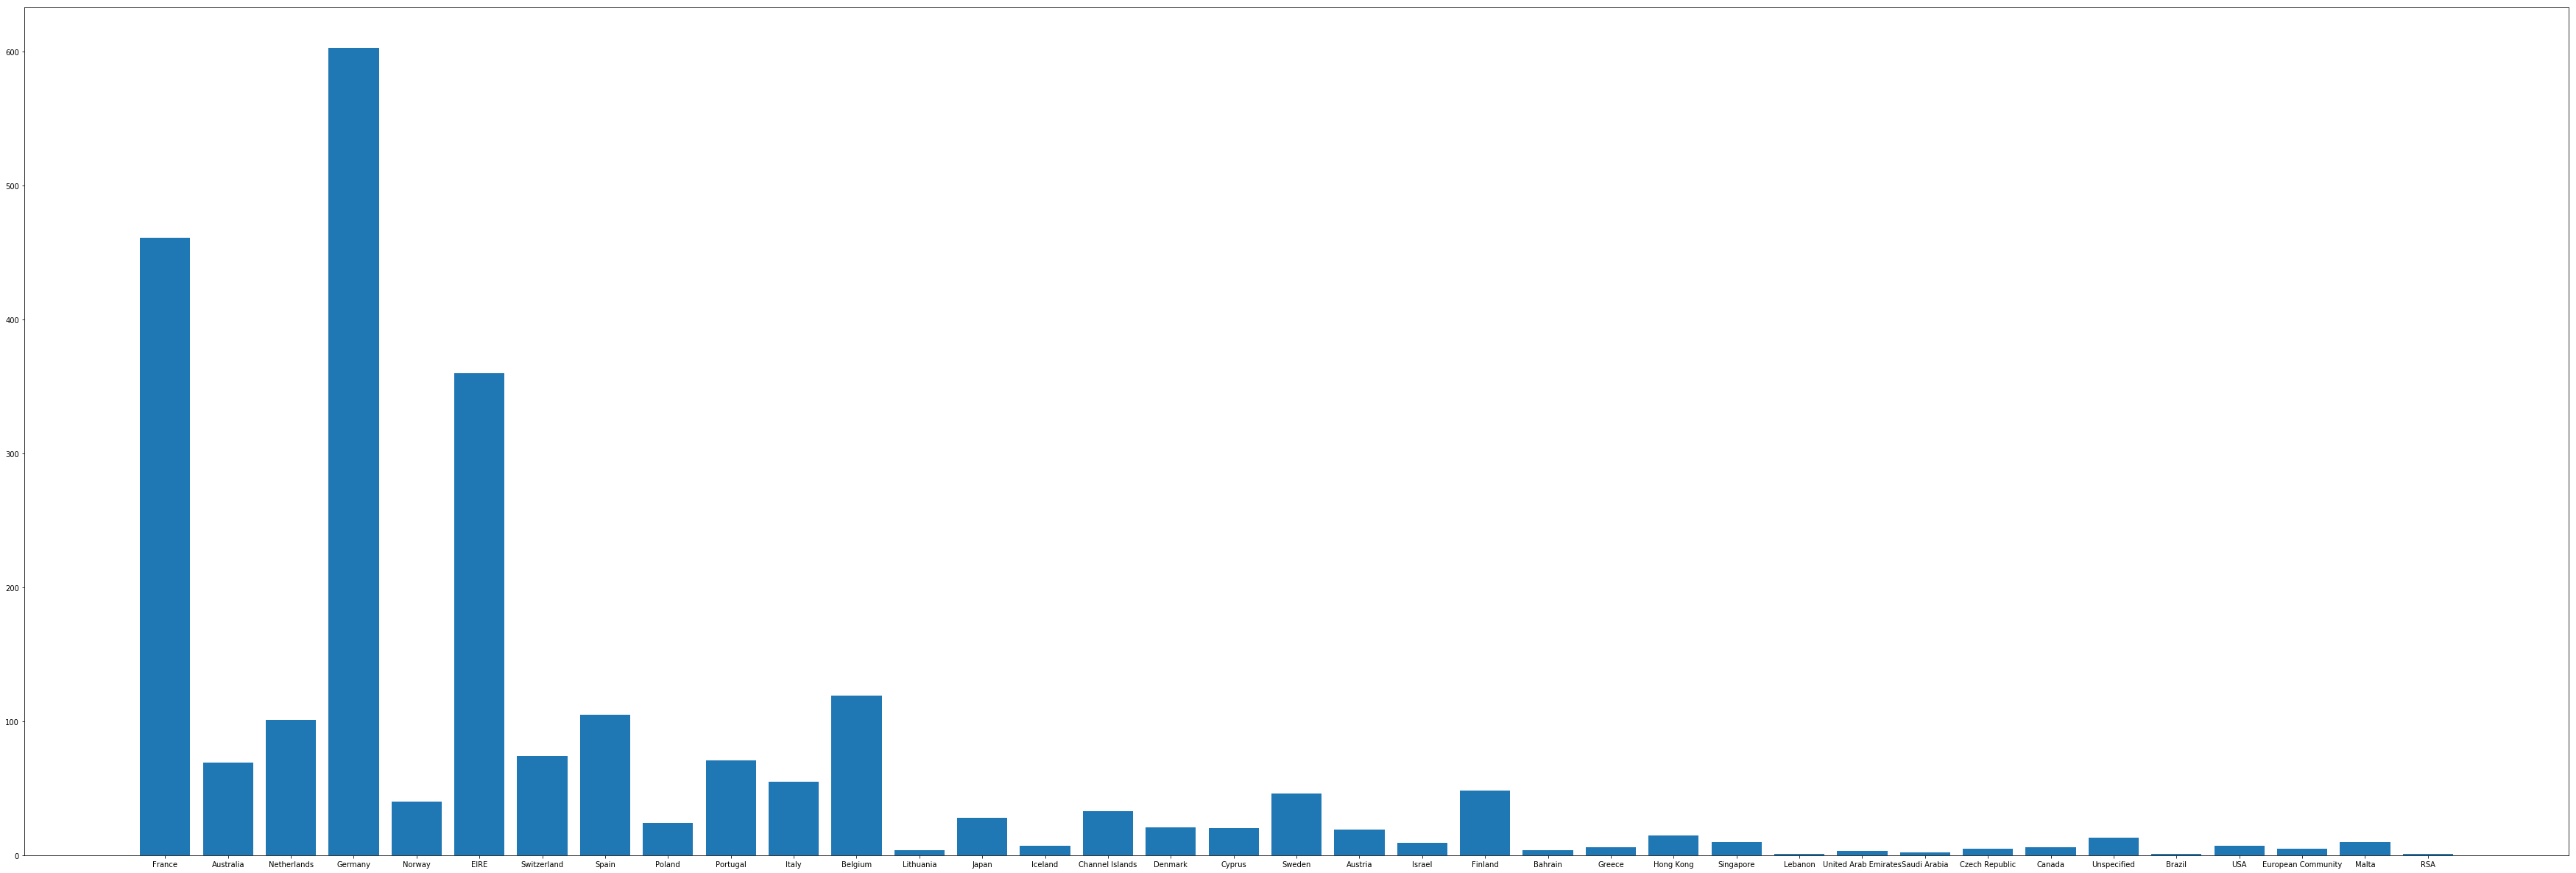

In [543]:
fig = plt.figure()
ax = fig.add_axes([0,0,8,4])
Country = Purchase['Country'][1:]
purchase = Purchase['No. of Purchases'][1:]
ax.bar(Country,purchase)
plt.show()

Above graph Excludes Purchases from United_Kingdom. It has the highest number of Purchases, More than 25000<br/>

Followed by Germany, France and EIRE

## 2.

In [450]:
Month_wise_Sale = data['month_year'].value_counts()[0:13]

In [460]:
Months = Month_wise_Sale.index
Sales = np.zeros([len(Months)])
j = 0
for name in Months:
    Sales[j] = int(len(data[data['month_year'] == name]['TransactionId'].unique()))
    j = j + 1
sales_monthly = pd.DataFrame({"Month_Year" : Months, "sales" : Sales})

In [469]:
sales_monthly.head()

,Month_Year,sales
0,Jan2019,3186.0
1,Dec2018,2737.0
2,Feb2019,2315.0
3,Nov2018,1841.0
4,Sep2018,1878.0


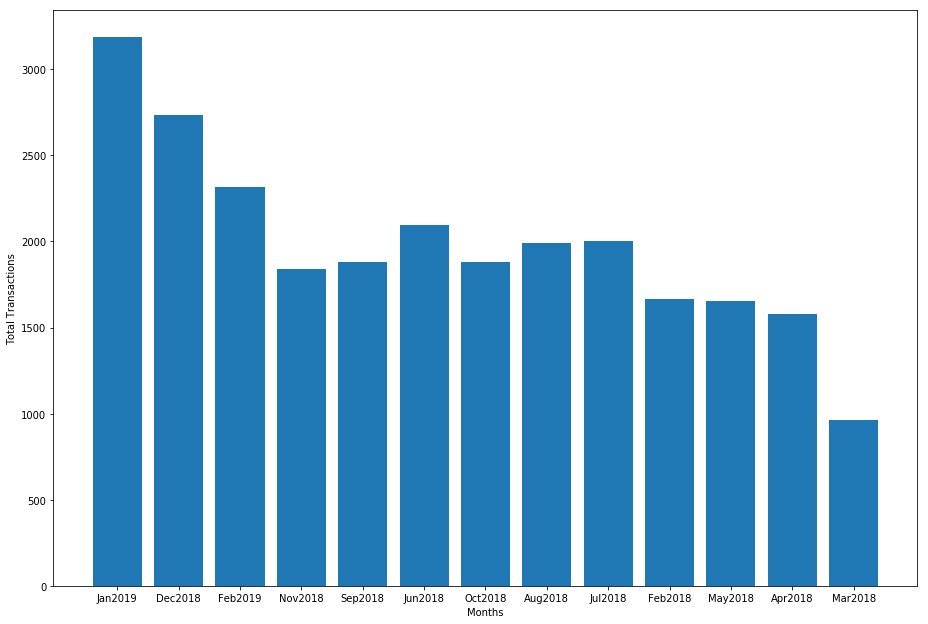

In [551]:
fig = plt.figure()
ax = fig.add_axes([0,0,2,2])
Country = sales_monthly['Month_Year']
purchase = sales_monthly['sales']
ax.bar(Country,purchase)
plt.xlabel("Months")
plt.ylabel("Total Transactions")
plt.show()

So, The Number of Sales were the most in the Last 3 Months[Jan2019,Dec2018 and Feb2019] and the least in March 2018 

## 3.

In [569]:
Months = Month_wise_Sale.index
Income = np.zeros([len(Months)])
j = 0
for name in Months:
    Income[j] = data[data['month_year'] == name]['Total_Cost'].sum()
    j = j + 1
income_monthly = pd.DataFrame({"Month_Year" : Months, "sales" : Income})

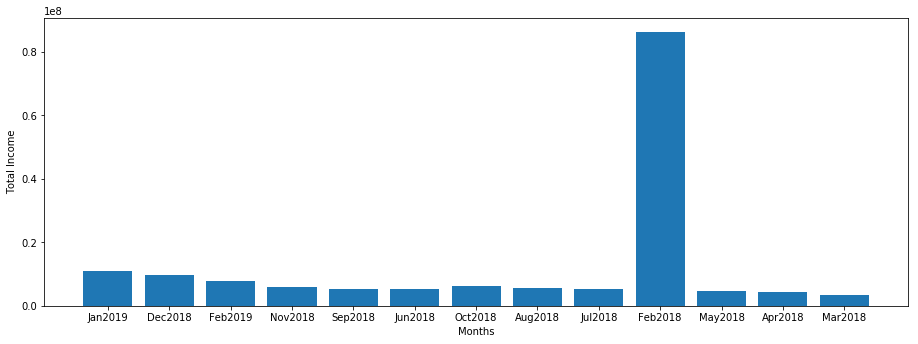

In [573]:
fig = plt.figure()
ax = fig.add_axes([0,0,2,1])
Country = income_monthly['Month_Year']
purchase = income_monthly['sales']
ax.bar(Country,purchase)
plt.xlabel("Months")
plt.ylabel("Total Income")
plt.show()

The highest amount of money Transaction was done in Feb2018, them there was a huge drop in Sales

In [472]:
income_monthly.head()

,Month_Year,sales
0,Jan2019,11088034.59
1,Dec2018,9549730.38
2,Feb2019,7910389.65
3,Nov2018,5813501.70
4,Sep2018,5181109.62


## 4.

In [490]:
Item_Codes = temp
Total_items_sold = np.zeros([len(temp)])
j = 0
for item in Item_Codes:
    Total_items_sold[j] = data[data['ItemCode'] == item]['NumberOfItemsPurchased'].sum()
    j = j + 1
Item_Summary = pd.DataFrame({"Item_name":Item_Codes, "Sales" : Total_items_sold })

In [501]:
Item_Summary = Item_Summary.sort_values(by=['Sales'], ascending=False)

In [503]:
# Top 3 Most Sold Products
Item_Summary.head()[0:3]

,Item_name,Sales
3147,1787079,462510.0
1129,466137,338700.0
2833,1765617,323082.0


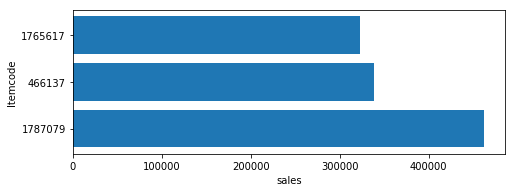

In [583]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,0.5])
Country = ["1787079","466137","1765617"]
purchase = Item_Summary['Sales'][0:3]
ax.barh(Country,purchase)
plt.xlabel("sales")
plt.ylabel("Itemcode")
plt.show()

So, These are our top 3 users

## 5.

In [ ]:
User_names = data['UserId'].unique()
Visits = np.zeros([len(User_names)])
j = 0
for item in User_names:
    Visits[j] = len(data[data['UserId'] == item]['TransactionId'].unique())
    j = j + 1
User_Summary = pd.DataFrame({"user_name":User_names, "Visit" : Visits })
User_Summary = User_Summary.sort_values(by=['Visit'], ascending=False)

In [508]:
# Top 5 Users
User_Summary.head()

,user_name,Visit
32,-1,3710.0
68,313131,248.0
49,267708,224.0
70,374661,169.0
94,306726,128.0


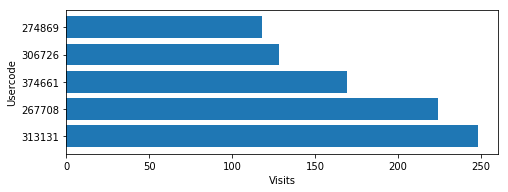

In [591]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,0.5])
Country = list(map(str,User_Summary['user_name'][1:6]))
purchase = User_Summary['Visit'][1:6]
ax.barh(Country,purchase)
plt.xlabel("Visits")
plt.ylabel("Usercode")
plt.show()

So, These are our top 5 Users.

### Final steps

In [609]:
Itemname = []
Item1 = []
Item2 = []
for i in range(3407):
    Itemname.append(Name(Solution[i][0]))
    Item1.append(Name(Solution[i][1]))
    Item2.append(Name(Solution[i][2]))

In [615]:
Answer = pd.DataFrame({"ItemCode":Solution[:,0],"Itemdescription":Itemname,"Prediction1":Solution[:,1],"Description1":Item1,"Prediction2":Solution[:,2],"Description2":Item2})

In [617]:
Answer.to_csv("Predictions.csv",index = False)

# DONE !! 